# Basic model

author: laquitainesteeve@gmail.com

## Setup 

activate fisher_info_limits

In [122]:
# import packages
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle5 as pickle
from scipy.stats import spearmanr, wilcoxon
from matplotlib.gridspec import GridSpec as GS
import math

# setup project path
main_dir = '/Users/steeve_laquitaine/Desktop/CARLO/code/fisher-info-limits/'
os.chdir(main_dir)

# import custom package
import ssiProjectModule as ssiMod

# setup parameters
sample_size = 500
theta_step = 2
stim = np.arange(0, 360, theta_step)

# setup paths
#main_dir = '/home/cparis/00PhD/'
main_dir = '/Users/steeve_laquitaine/Desktop/CARLO/code/fisher-info-limits/'
dat_dir_in = main_dir + 'data/decoding_analysis/'
data_dir = 'data/bayer_decoding_error/'+f'Bayes_Dec_Errs_{sample_size}reps_thetastep{theta_step}'+'.npz'

title = f'Stretch_BioQuads_multiplied_w_mean_g__theta_step={theta_step}_original_g_20240509_AREA.pkl'

constant = 360/np.sqrt(2*np.pi*math.e)

with open(dat_dir_in + title, 'rb') as rick:
    data_dict = pickle.load(rick)

bio_idx = np.where(data_dict['all_multipliers']==1.)[0][0]

chosen_quads = np.array([201, 125, 104, 491])

## Compute data

### Tuning curves

In [126]:
# setup parameters
N_NEURONS = 4
AMPLITUDE = 4000
WIDTH = 0.5
BASELINE = 0

# setup the preferred angle of each neuron
preferred_angles = np.linspace(0, 360, N_NEURONS, endpoint=False) 
print('Preferred angles:', preferred_angles)

# create tuning curves
tuning_c = []
for ix, pref_angle  in enumerate(preferred_angles):
    tuning_c.append(ssiMod.VON_MISES(th=stim, a=AMPLITUDE, th_0=pref_angle, s=WIDTH, baseline=BASELINE))
tuning_c = np.array(tuning_c)

Preferred angles: [  0.  90. 180. 270.]


### Compute Fisher information metrics

In [127]:
fisher_info = ssiMod.FISHER_POISSON(stim, tuning_c)
print("Fisher info shape:", fisher_info.shape)

Fisher info shape: (180,)


## Plot

/var/folders/_k/b_712yyj7vn5l6zfgz7s3xmc0000gn/T/ipykernel_47869/315791005.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


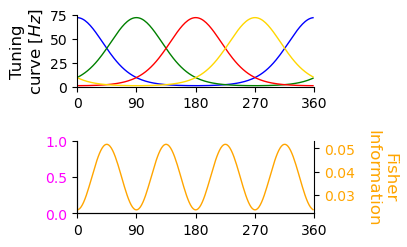

In [130]:
labelsize = 12
legend_fontsize = 14
text_size = 14
tick_labelsize = 10
lw = 1

plt.rcParams['xtick.labelsize']=tick_labelsize
plt.rcParams['ytick.labelsize']=tick_labelsize
mpl.rcParams['axes.spines.right']=False

# setup plot
fig = plt.figure(figsize=(15,7.5))
gs = GS(5, 4, wspace=0.3, hspace=0.75)
colors = ['blue', 'green', 'red', 'gold']

# Tuning curves ----------------
ax = fig.add_subplot(gs[0,i])
for j, tc in enumerate(tuning_c):
    ax.plot(stim, tc, color = colors[j], linewidth=lw)

# legend
ax.set_xlim(0,360)
ax.set_ylim(0,75)    
ax.set_xticks(np.arange(0,361, 90))
ax.set_yticks(np.arange(0,76, 25))

# Fisher information ----------------
ax1 = fig.add_subplot(gs[1,i])
ax2 = ax1.twinx()
ax2.plot(stim, fisher_info, color = 'orange', linewidth=lw)
ax2.spines['right'].set_visible(True)
ax1.tick_params('y', labelcolor = 'magenta')
ax2.tick_params('y', labelcolor = 'orange')
ax1.set_xlim(0,360)
ax1.set_xticks(np.arange(0,361, 90))

if i==0:
    ax.yaxis.set_label_coords(-0.135, y=0.5)
    ax.set_ylabel('Tuning\n'+r'curve [$Hz$]', size = labelsize)  

ax2.yaxis.set_label_coords(1.35, y=0.5)
ax2.set_ylabel('Fisher\n'+r'Information', rotation=270, color = 'orange', size = labelsize)        

#ax2.set_xlabel(r'Direction of motion [$\degree$]', size = labelsize)

#gs.update(left=0.055,right=0.925,top=0.95,bottom=0.05)#,wspace=0.3,hspace=0.5)
plt.tight_layout()

# plt.savefig('basic_model_fisher_info.svg', bbox_inches='tight', dpi = 300)
